In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
from datetime import datetime
from torch import nn
from tqdm.auto import tqdm


In [ ]:
air_reserve_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/air_reserve.csv') 
air_store_info_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/air_store_info.csv') 
air_visit_data_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/air_visit_data.csv') 
date_info_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/date_info.csv') 
hpg_reserve_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/hpg_reserve.csv') 
hpg_store_info_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/hpg_store_info.csv') 
store_id_relation_df = pd.read_csv('/content/drive/MyDrive/DL_CCU_2023_Spring/Deep Learning Mid-term Programming Exam 202304/store_id_relation.csv') 

In [ ]:
air_reserve_df

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10


In [ ]:
air_store_info_df

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956


In [ ]:
air_visit_data_df

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8


In [ ]:
date_info_df 

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
...,...,...,...
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0


In [ ]:
hpg_reserve_df

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
...,...,...,...,...
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9


In [ ]:
hpg_store_info_df

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
...,...,...,...,...,...
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.666137,139.733978
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.730068,139.711742


In [ ]:
store_id_relation_df

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7
...,...,...
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19


In [ ]:
air_visit_data_df

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8


In [ ]:
air_reserve_df['air_store_id'].nunique()

314

In [ ]:
hpg_reserve_df['hpg_store_id'].nunique()

13325

In [ ]:
store_id_relation_df.shape[0]

150

In [ ]:
def check_null_values(df: pd.DataFrame):
    """
    This function will check for null values in the dataframe
    """
    
    return np.any(df.isna().sum() > 1)

In [ ]:
print("Null values check".center(50, "="))
print()
print("air_reserve_df:", check_null_values(air_reserve_df))
print("air_store_info_df:", check_null_values(air_store_info_df))
print("air_visit_data_df:", check_null_values(air_visit_data_df))
print("date_info_df:", check_null_values(date_info_df))
print("hpg_reserve_df:", check_null_values(hpg_reserve_df))
print("hpg_store_info_df:", check_null_values(hpg_store_info_df))
print("store_id_relation_df:", check_null_values(store_id_relation_df))

================Null values check=================

air_reserve_df: False
air_store_info_df: False
air_visit_data_df: False
date_info_df: False
hpg_reserve_df: False
hpg_store_info_df: False
store_id_relation_df: False


In [ ]:
# rename the 'calendar_date' column to 'visit date'
date_info_df.rename(columns={'calendar_date': 'visit_date'}, inplace=True)
date_info_df

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
...,...,...,...
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0


In [ ]:
# merge the air_visit data and date info on 'visit date'
train_data_df = pd.merge(air_visit_data_df, date_info_df, how='left', on="visit_date")
train_data_df.sort_values(by='visit_date', inplace=True, ignore_index=True)

train_data_df

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1
4,air_79f528087f49df06,2016-01-01,42,Friday,1
...,...,...,...,...,...
252103,air_6a15e4eae523189d,2017-04-22,12,Saturday,0
252104,air_bf13014b6e3e60ca,2017-04-22,49,Saturday,0
252105,air_c52c63c781fe48f6,2017-04-22,41,Saturday,0
252106,air_59cc9b2b209c6331,2017-04-22,12,Saturday,0


In [ ]:
# merge the train data and air_store_info on 'air_store_id'
train_data_df = pd.merge(train_data_df, air_store_info_df, how='left', on="air_store_id")
train_data_df

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438
...,...,...,...,...,...,...,...,...,...
252103,air_6a15e4eae523189d,2017-04-22,12,Saturday,0,Bar/Cocktail,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
252104,air_bf13014b6e3e60ca,2017-04-22,49,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247
252105,air_c52c63c781fe48f6,2017-04-22,41,Saturday,0,Cafe/Sweets,Fukuoka-ken Itoshima-shi Maebarunishi,33.557320,130.195555
252106,air_59cc9b2b209c6331,2017-04-22,12,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247


In [ ]:
# date time conversion
air_reserve_df.visit_datetime = pd.to_datetime(air_reserve_df.visit_datetime)
air_reserve_df.reserve_datetime = pd.to_datetime(air_reserve_df.reserve_datetime)

# add the hours gap difference between visit time to reservation time
air_reserve_diff = air_reserve_df.visit_datetime - air_reserve_df.reserve_datetime
air_reserve_diff = air_reserve_diff / np.timedelta64(1, 'h')
air_reserve_df['reservation_gap'] = air_reserve_diff

# add the visit date column
air_reserve_df['visit_date'] = air_reserve_df.visit_datetime.dt.date
air_reserve_df

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reservation_gap,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,3.0,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,0.0,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,0.0,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,4.0,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,19.0,2016-01-01
...,...,...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6,1007.0,2017-05-29
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,990.0,2017-05-30
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3,1173.0,2017-05-31
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10,1012.0,2017-05-31


In [ ]:
# we need to get total reservation visitors on the visit_date per restaurant
reservations_per_day = air_reserve_df.groupby(by=['air_store_id', 'visit_date'], as_index=False).sum(numeric_only=True)

reservations_per_day.visit_date = pd.to_datetime(reservations_per_day.visit_date)
# reservations_per_day
# merge train_data_df and the total reservations done on the visit date per store id
train_data_df.visit_date = pd.to_datetime(train_data_df.visit_date)
train_data_df = pd.merge(train_data_df, reservations_per_day, how='left', on=['visit_date', 'air_store_id'])
train_data_df.fillna(0, inplace=True)
train_data_df.head(500)


,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors,reservation_gap
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,air_457efe8c3a30ea17,2016-01-05,6,Tuesday,0,Creative cuisine,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0
496,air_670a0c1c4108bcea,2016-01-05,20,Tuesday,0,Okonomiyaki/Monja/Teppanyaki,Ōsaka-fu Ōsaka-shi Kyūtarōmachi,34.681261,135.509801,2.0,1.0
497,air_675aa35cba456fd1,2016-01-05,31,Tuesday,0,Izakaya,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,0.0
498,air_28a9fa1ec0839375,2016-01-05,18,Tuesday,0,Izakaya,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386244,132.455018,0.0,0.0


In [ ]:
## we need to extract the reservation made to the same AIR restaurants through HPG reservation system

# get the air_store_id's reservations done throught HPG reservation
hpg_database_df = pd.merge(hpg_reserve_df, store_id_relation_df, how='inner', on='hpg_store_id')

# add their store_information
hpg_database_df = pd.merge(hpg_database_df, hpg_store_info_df, how='left', on='hpg_store_id')

# add the reservation time diff
hpg_database_df.visit_datetime = pd.to_datetime(hpg_database_df.visit_datetime)
hpg_database_df.reserve_datetime = pd.to_datetime(hpg_database_df.reserve_datetime)
hpg_reserve_diff = hpg_database_df.visit_datetime - hpg_database_df.reserve_datetime
hpg_reserve_diff = hpg_reserve_diff / np.timedelta64(1, 'h')
hpg_database_df['hpg_reserve_gap'] = hpg_reserve_diff
hpg_database_df['hpg_visit_date'] = hpg_database_df.visit_datetime.dt.date

In [ ]:
# we need to get total reservation visitors on the visit_date per restaurant
hpg_reservations_per_day = hpg_database_df.groupby(by=['air_store_id', 'hpg_visit_date'], as_index=False)[['reserve_visitors', 'hpg_reserve_gap']].sum()
hpg_reservations_per_day.rename(columns={'hpg_visit_date': 'visit_date'}, inplace=True)
hpg_reservations_per_day.visit_date = pd.to_datetime(hpg_reservations_per_day.visit_date)

# merge train_data_df and the total reservations done on the visit date per store id
train_data_df = pd.merge(train_data_df, hpg_reservations_per_day, how='left', on=['visit_date', 'air_store_id'], suffixes=("_air", "_hpg"))
train_data_df.fillna(0, inplace=True)

# fill no reservation with zero
train_data_df

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252103,air_6a15e4eae523189d,2017-04-22,12,Saturday,0,Bar/Cocktail,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,0.0,0.0,0.0
252104,air_bf13014b6e3e60ca,2017-04-22,49,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,0.0,0.0,0.0,0.0
252105,air_c52c63c781fe48f6,2017-04-22,41,Saturday,0,Cafe/Sweets,Fukuoka-ken Itoshima-shi Maebarunishi,33.557320,130.195555,0.0,0.0,0.0,0.0
252106,air_59cc9b2b209c6331,2017-04-22,12,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,0.0,0.0,0.0,0.0


In [ ]:
print()
print("Train Data information".center(50, "="))
print()
print("Dataset size: ", train_data_df.shape)
print("Total unique restaurants", len(train_data_df.air_store_id.unique()))


==============Train Data information==============

Dataset size:  (252108, 13)
Total unique restaurants 829


In [ ]:
# training_data_df

In [ ]:
# test_data_df

In [ ]:
print()
print("Data information".center(50, "="))
print()
print("Train Dataset size: ", train_data_df.shape)
print("Total unique restaurants", len(train_data_df.air_store_id.unique()))
# print()
# print("Tese Dataset size: ", test_data_df.shape)
# print("Total unique restaurants", len(test_data_df.air_store_id.unique()))



=================Data information=================

Train Dataset size:  (252108, 13)
Total unique restaurants 829


In [ ]:
train_data_df.nunique()

air_store_id             829
visit_date               478
visitors                 204
day_of_week                7
holiday_flg                2
air_genre_name            14
air_area_name            103
latitude                 108
longitude                108
reserve_visitors_air     117
reservation_gap         2464
reserve_visitors_hpg      79
hpg_reserve_gap         1346
dtype: int64

In [ ]:
# test_data_df.nunique()

In [ ]:
train_data_df.drop(columns=["air_store_id"], inplace=True)

In [ ]:
train_data_df

,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap
0,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
252103,2017-04-22,12,Saturday,0,Bar/Cocktail,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,0.0,0.0,0.0
252104,2017-04-22,49,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,0.0,0.0,0.0,0.0
252105,2017-04-22,41,Saturday,0,Cafe/Sweets,Fukuoka-ken Itoshima-shi Maebarunishi,33.557320,130.195555,0.0,0.0,0.0,0.0
252106,2017-04-22,12,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,0.0,0.0,0.0,0.0


In [ ]:
# training_data_df['air_genre_name'].replace(training_data_df['air_genre_name'].unique().tolist(),
#                         list(range(training_data_df['air_genre_name'].nunique())), inplace=True)

In [ ]:
#day_of_week, air_genre_name, air_area_name to numerical value
# train_data_df['day_of_week'] = pd.factorize(train_data_df['day_of_week'])[0]
# train_data_df['air_genre_name'] = pd.factorize(train_data_df['air_genre_name'])[0]
# train_data_df['air_area_name'] = pd.factorize(train_data_df['air_area_name'])[0]

In [ ]:
train_data_df

,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap
0,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
252103,2017-04-22,12,Saturday,0,Bar/Cocktail,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,0.0,0.0,0.0
252104,2017-04-22,49,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,0.0,0.0,0.0,0.0
252105,2017-04-22,41,Saturday,0,Cafe/Sweets,Fukuoka-ken Itoshima-shi Maebarunishi,33.557320,130.195555,0.0,0.0,0.0,0.0
252106,2017-04-22,12,Saturday,0,Cafe/Sweets,Tōkyō-to Setagaya-ku Setagaya,35.646572,139.653247,0.0,0.0,0.0,0.0


In [ ]:
# Extract the month, and day components
# train_data_df['year'] = train_data_df['visit_date'].dt.year
train_data_df['month'] = train_data_df['visit_date'].dt.month
train_data_df['day'] = train_data_df['visit_date'].dt.day

# One-hot encode the month, and day columns
# train_data_df = pd.get_dummies(train_data_df, columns=['year', 'month', 'day'], dtype=int)
train_data_df = pd.get_dummies(train_data_df, columns=['month', 'day'], dtype=int)

# One-hot encode the air_genre_name, air_area_name, day_of_week columns
train_data_df = pd.get_dummies(train_data_df, columns=['day_of_week', 'air_genre_name', 'air_area_name'], dtype=int)


train_data_df

,visit_date,visitors,holiday_flg,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,month_1,...,air_area_name_Ōsaka-fu Sakai-shi Minamikawaramachi,air_area_name_Ōsaka-fu Suita-shi Izumichō,air_area_name_Ōsaka-fu Ōsaka-shi Fuminosato,air_area_name_Ōsaka-fu Ōsaka-shi Kyōmachibori,air_area_name_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō,air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae,air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki
0,2016-01-01,19,1,33.581941,130.348436,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01,64,1,35.693840,139.703549,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01,102,1,35.669290,139.707056,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01,55,1,34.799767,135.360073,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,42,1,35.699566,139.636438,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252103,2017-04-22,12,0,35.694003,139.753595,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
252104,2017-04-22,49,0,35.646572,139.653247,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
252105,2017-04-22,41,0,33.557320,130.195555,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
252106,2017-04-22,12,0,35.646572,139.653247,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(len(train_data_df.columns.tolist()))
print(train_data_df.columns.tolist())

176
['visit_date', 'visitors', 'holiday_flg', 'latitude', 'longitude', 'reserve_visitors_air', 'reservation_gap', 'reserve_visitors_hpg', 'hpg_reserve_gap', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'air_genre_name_Asian', 'air_genre_name_Bar/Cocktail', 'air_genre_name_Cafe/Sweets', 'air_genre_name_Creative cuisine', 'air_genre_name_Dining bar', 'air_genre_name_International cuisine', 'air_genre_name_Italian/French', 'air_genre_name_Izakaya

In [ ]:
split_date = datetime(2016,12,31)
new_train_data_df = train_data_df.loc[train_data_df['visit_date'] <= split_date]
test_data_df = train_data_df.loc[train_data_df['visit_date'] > split_date]
new_train_data_df._is_view

False

In [ ]:
new_train_data_df

,visit_date,visitors,holiday_flg,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,month_1,...,air_area_name_Ōsaka-fu Sakai-shi Minamikawaramachi,air_area_name_Ōsaka-fu Suita-shi Izumichō,air_area_name_Ōsaka-fu Ōsaka-shi Fuminosato,air_area_name_Ōsaka-fu Ōsaka-shi Kyōmachibori,air_area_name_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō,air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae,air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki
0,2016-01-01,19,1,33.581941,130.348436,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01,64,1,35.693840,139.703549,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01,102,1,35.669290,139.707056,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01,55,1,34.799767,135.360073,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,42,1,35.699566,139.636438,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174530,2016-12-31,18,1,34.681261,135.509801,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
174531,2016-12-31,29,1,35.752804,139.733481,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
174532,2016-12-31,13,1,35.693840,139.703549,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
174533,2016-12-31,15,1,33.589216,130.392813,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data_df

,visit_date,visitors,holiday_flg,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,month_1,...,air_area_name_Ōsaka-fu Sakai-shi Minamikawaramachi,air_area_name_Ōsaka-fu Suita-shi Izumichō,air_area_name_Ōsaka-fu Ōsaka-shi Fuminosato,air_area_name_Ōsaka-fu Ōsaka-shi Kyōmachibori,air_area_name_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō,air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae,air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki
174535,2017-01-01,1,1,35.659397,139.696440,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
174536,2017-01-01,22,1,34.386244,132.455018,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
174537,2017-01-01,8,1,35.661777,139.704051,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
174538,2017-01-01,4,1,35.726232,139.723240,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
174539,2017-01-01,37,1,35.671270,139.796987,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252103,2017-04-22,12,0,35.694003,139.753595,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
252104,2017-04-22,49,0,35.646572,139.653247,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
252105,2017-04-22,41,0,33.557320,130.195555,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
252106,2017-04-22,12,0,35.646572,139.653247,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(new_train_data_df.nunique())
print(test_data_df.nunique())

visit_date                                           366
visitors                                             188
holiday_flg                                            2
latitude                                             108
longitude                                            108
                                                    ... 
air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō             2
air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae      2
air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi             2
air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi              2
air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki               2
Length: 176, dtype: int64
visit_date                                           112
visitors                                             162
holiday_flg                                            2
latitude                                             108
longitude                                            108
                                                    ... 
air_a

In [ ]:
# # drop visit_date column
# train_data_df.drop(columns=["visit_date"], inplace=True)
# train_data_df.dtypes
# # convert the dataframe to a tensor
# train_data_df_tensor = torch.tensor(train_data_df.values)


In [ ]:
# drop visit_date column
new_train_data_df = new_train_data_df.drop(columns=["visit_date"])
test_data_df = test_data_df.drop(columns=["visit_date"])




In [ ]:
# seperate data to train, train_label, test, test_label
train_label = new_train_data_df[['visitors']]
test_label = test_data_df[['visitors']]

train = new_train_data_df.drop(columns=["visitors"])
test = test_data_df.drop(columns=["visitors"])


In [ ]:
new_train_data_df

,visitors,holiday_flg,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,month_1,month_2,...,air_area_name_Ōsaka-fu Sakai-shi Minamikawaramachi,air_area_name_Ōsaka-fu Suita-shi Izumichō,air_area_name_Ōsaka-fu Ōsaka-shi Fuminosato,air_area_name_Ōsaka-fu Ōsaka-shi Kyōmachibori,air_area_name_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō,air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae,air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki
0,19,1,33.581941,130.348436,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,64,1,35.693840,139.703549,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,102,1,35.669290,139.707056,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,55,1,34.799767,135.360073,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,42,1,35.699566,139.636438,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174530,18,1,34.681261,135.509801,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
174531,29,1,35.752804,139.733481,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
174532,13,1,35.693840,139.703549,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
174533,15,1,33.589216,130.392813,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_label

,visitors
0,19
1,64
2,102
3,55
4,42
...,...
174530,18
174531,29
174532,13
174533,15


In [ ]:
test_label

,visitors
174535,1
174536,22
174537,8
174538,4
174539,37
...,...
252103,12
252104,49
252105,41
252106,12


In [ ]:
train

,holiday_flg,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,month_1,month_2,month_3,...,air_area_name_Ōsaka-fu Sakai-shi Minamikawaramachi,air_area_name_Ōsaka-fu Suita-shi Izumichō,air_area_name_Ōsaka-fu Ōsaka-shi Fuminosato,air_area_name_Ōsaka-fu Ōsaka-shi Kyōmachibori,air_area_name_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō,air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae,air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki
0,1,33.581941,130.348436,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,35.693840,139.703549,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,35.669290,139.707056,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34.799767,135.360073,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,35.699566,139.636438,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174530,1,34.681261,135.509801,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
174531,1,35.752804,139.733481,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174532,1,35.693840,139.703549,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174533,1,33.589216,130.392813,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test

,holiday_flg,latitude,longitude,reserve_visitors_air,reservation_gap,reserve_visitors_hpg,hpg_reserve_gap,month_1,month_2,month_3,...,air_area_name_Ōsaka-fu Sakai-shi Minamikawaramachi,air_area_name_Ōsaka-fu Suita-shi Izumichō,air_area_name_Ōsaka-fu Ōsaka-shi Fuminosato,air_area_name_Ōsaka-fu Ōsaka-shi Kyōmachibori,air_area_name_Ōsaka-fu Ōsaka-shi Kyūtarōmachi,air_area_name_Ōsaka-fu Ōsaka-shi Nakanochō,air_area_name_Ōsaka-fu Ōsaka-shi Nanbasennichimae,air_area_name_Ōsaka-fu Ōsaka-shi Shinmachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōgimachi,air_area_name_Ōsaka-fu Ōsaka-shi Ōhiraki
174535,1,35.659397,139.696440,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
174536,1,34.386244,132.455018,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
174537,1,35.661777,139.704051,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
174538,1,35.726232,139.723240,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
174539,1,35.671270,139.796987,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252103,0,35.694003,139.753595,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252104,0,35.646572,139.653247,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252105,0,33.557320,130.195555,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252106,0,35.646572,139.653247,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# convert the train, train_label, test, test_label to tensor
train = torch.tensor(train.values, requires_grad=True, dtype=torch.float32)
train_label = torch.tensor(train_label.values, requires_grad=True, dtype=torch.float32)
test = torch.tensor(test.values, requires_grad=True, dtype=torch.float32)
test_label = torch.tensor(test_label.values, requires_grad=True, dtype=torch.float32)

In [ ]:
print(f"train shape: {train.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"test shape: {test.shape}")
print(f"test_label shape: {test_label.shape}")

train shape: torch.Size([174535, 174])
train_label shape: torch.Size([174535, 1])
test shape: torch.Size([77573, 174])
test_label shape: torch.Size([77573, 1])


In [ ]:
# new_train_data_df_tensor

In [ ]:
# test_data_df_tensor

In [ ]:
# new_train_data_df_tensor.shape

In [ ]:
# test_data_df_tensor.shape

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(174, 200)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(200, 150)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(150, 1)
        self.act3 = nn.ReLU()
        # self.output = nn.Linear(30, 1)
        # self.sigmoid = nn.Sigmoid()
    
    
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        return x 

# 4. Create an instance of the model and send it to target device
# model_0 = CircleModelV0().to(device)
model_0 = model()
model_0

model(
  (layer1): Linear(in_features=174, out_features=200, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=200, out_features=150, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=150, out_features=1, bias=True)
  (act3): ReLU()
)

In [ ]:
model_0(test)

tensor([[0.2128],
        [0.2088],
        [0.2261],
        ...,
        [0.2001],
        [0.2216],
        [0.2366]], grad_fn=<ReluBackward0>)

In [ ]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [ ]:
criterion = RMSLELoss()

# rmsle = criterion(pred, actual)

In [ ]:
# y_test_pred = model_0(test)
# print(y_test_pred)
# print(test_label)
# # loss_fn = RMSLELoss()
# print(test_label.shape)
# print(y_test_pred.shape)
# print(criterion(y_test_pred, test_label))

In [ ]:
def plot(epochs, train_loss_list, test_loss_list, offset, modulus_ramainder):
  epochs_list= [epoch for epoch in range(epochs) if epoch % offset == modulus_ramainder]
  # print(len(train_loss_list))
  # print(len(test_loss_list))
  # print(epochs)
  plt.plot(epochs_list, train_loss_list, label="Train loss")
  plt.plot(epochs_list, test_loss_list, label="Test loss")
  plt.title("Training and test loss curves")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
def train_test_with_optimizer(model, epochs, optimizer):
  train_loss_list = []
  test_loss_list = []
  for epoch in range(epochs):
    # print(f"Epoch: {epoch}\n-------")
    
    ### Training
    model.train()
    train_loss = 0
    train_predicted = model(train)
    loss = criterion(train_predicted, train_label)
    if epoch % 10 == 5:
      train_loss_list.append(loss.detach().numpy())
    # init optimizer
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # optimizer
    optimizer.step()

    
    # if (epoch + 1) % 10 == 0:
    #       print(f'epoch {epoch + 1}: loss = {loss:.8f}')
    ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_prediction = model(test)
        # 2. Caculate loss
        test_loss = criterion(test_prediction, test_label)
        if epoch % 10 == 5:
          test_loss_list.append(test_loss.detach().numpy())    
    # Print out what's happening every 10 epochs
    if epoch % 10 == 5:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")
    # for i, batch in enumerate(train_data_loader):
    #   print(f"i: {i}\n-------")
    #   print(f"batch: {batch}\n-------")
  return train_loss_list, test_loss_list

**No optimizer**

In [ ]:
epochs = 50
learning_rate = 0.01
optimizer = torch.optim.Adam(model_0.parameters(), lr=learning_rate)
# train_data_loader = data.DataLoader(train, batch_size=32, shuffle=True)
train_loss_list = []
test_loss_list = []
for epoch in range(epochs):
  # print(f"Epoch: {epoch}\n-------")
  
  ### Training
  model_0.train()
  train_loss = 0
  train_predicted = model_0(train)
  loss = criterion(train_predicted, train_label)
  if epoch % 10 == 5:
    train_loss_list.append(loss.detach().numpy())
  # init optimizer
  # optimizer.zero_grad()

  # backward pass
  loss.backward()

  # optimizer
  # optimizer.step()

  ### Testing
  model_0.eval()
  # with torch.inference_mode():
  #     # 1. Forward pass
  #     test_prediction = model_0(test)
  #     # 2. Caculate loss
  #     test_loss = criterion(test_prediction, test_label)
  #     if epoch % 10 == 9:
  #       test_loss_list.append(test_loss.detach().numpy())    
   
  
  
  with torch.no_grad():
    # 1. Forward pass
    test_prediction = model_0(test)
    # 2. Caculate loss
    test_loss = criterion(test_prediction, test_label)
    if epoch % 10 == 5:
      test_loss_list.append(test_loss.detach().numpy())    
    for parameter in model_0.parameters():
      parameter -= learning_rate * parameter.grad
    model_0.zero_grad()
  if epoch % 10 == 5:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 5 | Loss: 0.81282 | Test loss: 0.81041
Epoch: 15 | Loss: 0.79741 | Test loss: 0.80218
Epoch: 25 | Loss: 0.79676 | Test loss: 0.80248
Epoch: 35 | Loss: 0.79648 | Test loss: 0.80242
Epoch: 45 | Loss: 0.79629 | Test loss: 0.80233


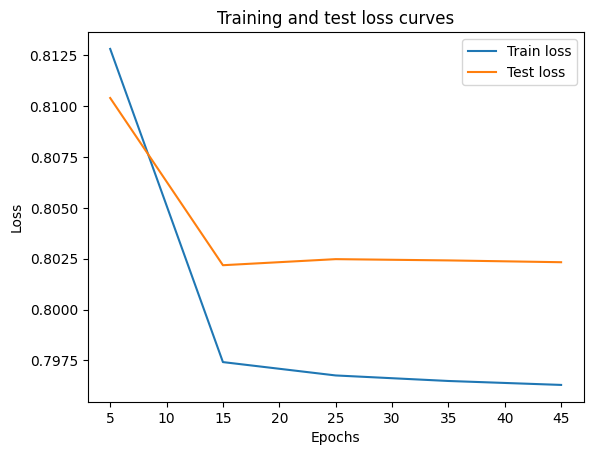

In [ ]:
plot(epochs, train_loss_list, test_loss_list, 10, 5)

**With optimizer(SGD)**

In [ ]:
model_1 = model()

In [ ]:
epochs = 50
learning_rate = 0.01
# optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate)
train_loss_list, test_loss_list = train_test_with_optimizer(model_1, epochs, optimizer)

Epoch: 5 | Loss: 0.97697 | Test loss: 0.89069
Epoch: 15 | Loss: 0.80135 | Test loss: 0.80389
Epoch: 25 | Loss: 0.79839 | Test loss: 0.80384
Epoch: 35 | Loss: 0.79770 | Test loss: 0.80338
Epoch: 45 | Loss: 0.79720 | Test loss: 0.80292


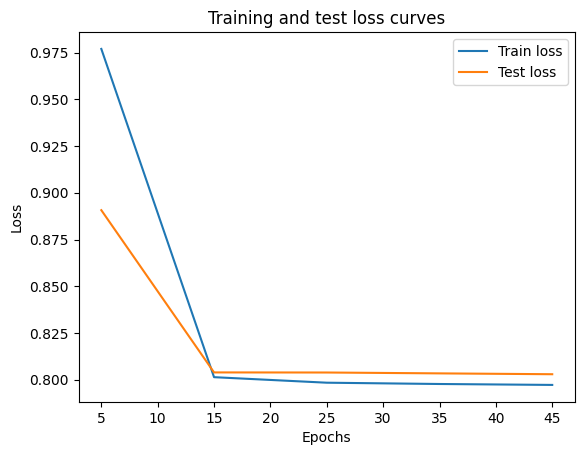

In [ ]:
plot(epochs, train_loss_list, test_loss_list, 10, 5)

**With optimizer(Adagrad)**

In [ ]:
model_2 = model()

In [ ]:
epochs = 50
learning_rate = 0.01
# optimizer = torch.optim.RMSprop(model_2.parameters(), lr=learning_rate, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
optimizer = torch.optim.Adagrad(model_2.parameters(), lr=learning_rate, lr_decay=0, weight_decay=0, initial_accumulator_value=0)
# optimizer = torch.optim.RMSprop(model_2.parameters(), lr=learning_rate)
train_loss_list, test_loss_list = train_test_with_optimizer(model_2, epochs, optimizer)

Epoch: 5 | Loss: 0.79405 | Test loss: 0.79681
Epoch: 15 | Loss: 0.79457 | Test loss: 0.79877
Epoch: 25 | Loss: 0.78919 | Test loss: 0.79297
Epoch: 35 | Loss: 0.78708 | Test loss: 0.79016
Epoch: 45 | Loss: 0.78539 | Test loss: 0.78870


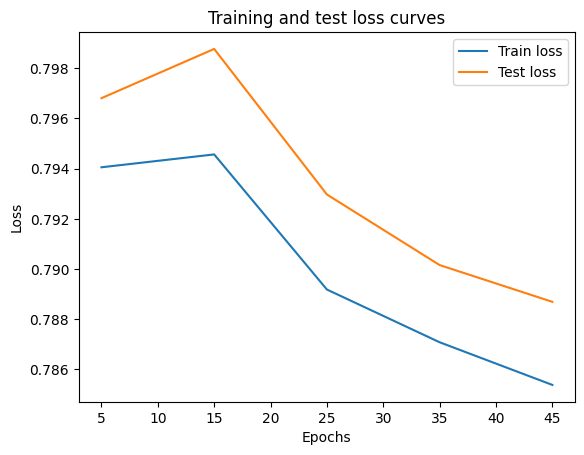

In [ ]:
plot(epochs, train_loss_list, test_loss_list, 10, 5)

**With optimizer(Adam)**

In [ ]:
model_3 = model()

In [ ]:
epochs = 50
learning_rate = 0.01
optimizer = torch.optim.Adam(model_3.parameters(), lr=learning_rate)
train_loss_list, test_loss_list = train_test_with_optimizer(model_3, epochs, optimizer)


Epoch: 5 | Loss: 1.02379 | Test loss: 0.93403
Epoch: 15 | Loss: 0.80755 | Test loss: 0.81453
Epoch: 25 | Loss: 0.80428 | Test loss: 0.80492
Epoch: 35 | Loss: 0.79015 | Test loss: 0.79554
Epoch: 45 | Loss: 0.78731 | Test loss: 0.79052


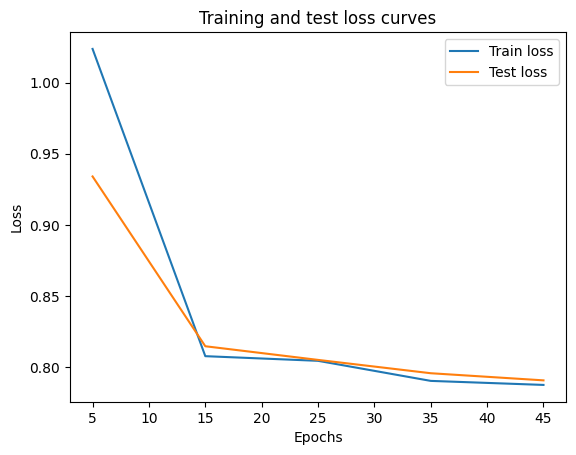

In [ ]:
plot(epochs, train_loss_list, test_loss_list, 10, 5)